1. Importieren der Bibliotheken und Laden der Daten
Wir importieren die notwendigen Python-Bibliotheken für die Datenanalyse und Visualisierung und laden die Excel-Daten.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Laden der Excel-Daten
data_excel_file_path = 'station_data_analysis.xlsx'

if not os.path.exists(data_excel_file_path):
    raise FileNotFoundError(f"Die Datei {data_excel_file_path} wurde nicht gefunden.")

try:
    station_data = pd.read_excel(data_excel_file_path, sheet_name='Station Status')
    station_info = pd.read_excel(data_excel_file_path, sheet_name='Station Information')
    vehicle_types = pd.read_excel(data_excel_file_path, sheet_name='Vehicle Types')
    soll_werte = pd.read_excel(data_excel_file_path, sheet_name='Soll Werte')
except Exception as e:
    raise ValueError(f"Fehler beim Laden der Excel-Datei: {e}")

# Definition der Lubus IDs
lubu_ids = [
    "958219cd-8009-45b6-8a04-1cc4ae763307",
    "714932fd-4836-4a2a-9a19-07a6d694274c",
    "be796eb3-49af-494c-b3f0-dc1f0132eb7d",
    "c070e40c-98f6-45d6-9543-90ceceef63af",
    "ca41b63e-9046-442f-880e-d0e9186e507a",
    "36fe6a30-d53e-4aa8-863d-e21e80fd1d0b",
    "7046d131-47fd-40bd-ba63-f52590d2ee8f",
    "2263b695-db35-4bbf-b70a-032920fadf3f"
]

# Hilfsstrukturen erstellen
id_to_name = pd.Series(station_info['name'].values, index=station_info['station_id']).to_dict()
vehicle_type_mapping = vehicle_types.set_index('vehicle_type_id')['name'].to_dict()


2. Funktion zur Extraktion der Fahrzeuganzahl <br>
Diese Funktion extrahiert die Anzahl der Fahrzeuge eines bestimmten Typs an einer Station.

In [2]:
def extract_vehicle_count(station_entries, vehicle_type_name):
    counts = []
    for entry in station_entries:
        count = 0
        if isinstance(entry, dict) and 'vehicle_data' in entry:
            vehicle_data = entry['vehicle_data']
            for vehicle in vehicle_data:
                if vehicle_type_mapping.get(vehicle['vehicle_type_id']) == vehicle_type_name:
                    count = vehicle['count']
                    break
        counts.append(count)
    return counts


3. Visualisierung für alle Stationen ohne Soll-Werte <br>
Visualisieren der Verfügbarkeit der Fahrräder an allen Stationen über die Zeit ohne Soll-Werte.

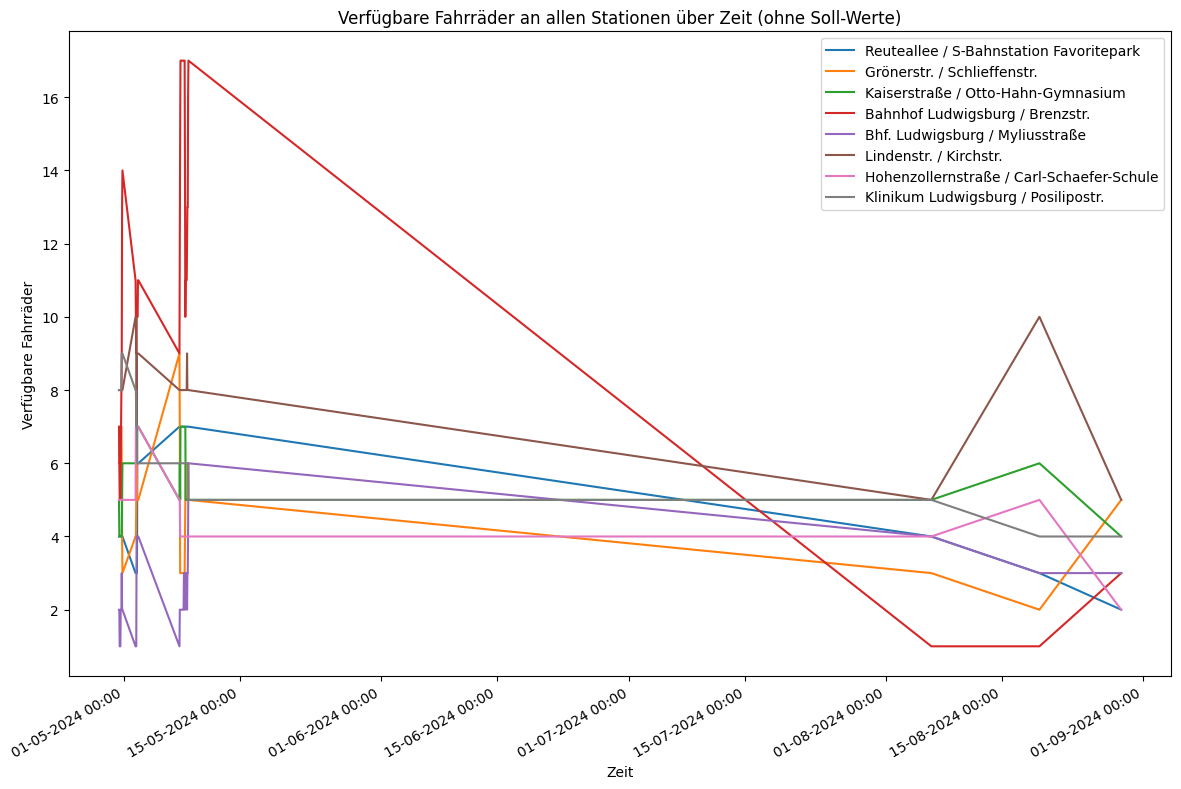

In [3]:
def visualize_all_stations_no_soll(bike_type='all'):
    plt.figure(figsize=(12, 8))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()
    
    for station_id in lubu_ids:
        if station_id in station_data['station_id'].values:
            filtered_data = station_data[station_data['station_id'] == station_id].to_dict('records')
            
            if bike_type == 'all':
                counts = [entry['num_bikes_available'] for entry in filtered_data]
            else:
                counts = extract_vehicle_count(filtered_data, bike_type)
            
            plt.plot([entry['timestamp'] for entry in filtered_data], counts, label=id_to_name[station_id])
    
    plt.title('Verfügbare Fahrräder an allen Stationen über Zeit (ohne Soll-Werte)')
    plt.xlabel('Zeit')
    plt.ylabel('Verfügbare Fahrräder')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Aufruf zur Visualisierung für alle Stationen ohne Soll-Werte
visualize_all_stations_no_soll(bike_type='all')

4. Visualisierung für eine einzelne Station ohne Soll-Werte <br>
Visualisieren der Verfügbarkeit der Fahrräder an einer einzelnen Station über die Zeit ohne Soll-Werte.

In [4]:
def visualize_single_station_no_soll(station_id_requested, bike_type='all'):
    plt.figure(figsize=(12, 8))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()

    if station_id_requested in lubu_ids and station_id_requested in station_data['station_id'].values:
        filtered_data = station_data[station_data['station_id'] == station_id_requested].to_dict('records')
        
        if bike_type == 'all':
            counts = [entry['num_bikes_available'] for entry in filtered_data]
        else:
            counts = extract_vehicle_count(filtered_data, bike_type)
        
        plt.plot([entry['timestamp'] for entry in filtered_data], counts, label=id_to_name[station_id_requested])
        plt.title(f'Verfügbare Fahrräder an Station {id_to_name[station_id_requested]} über Zeit (ohne Soll-Werte)')
        plt.xlabel('Zeit')
        plt.ylabel('Verfügbare Fahrräder')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Keine Daten für Station ID {station_id_requested} gefunden.")


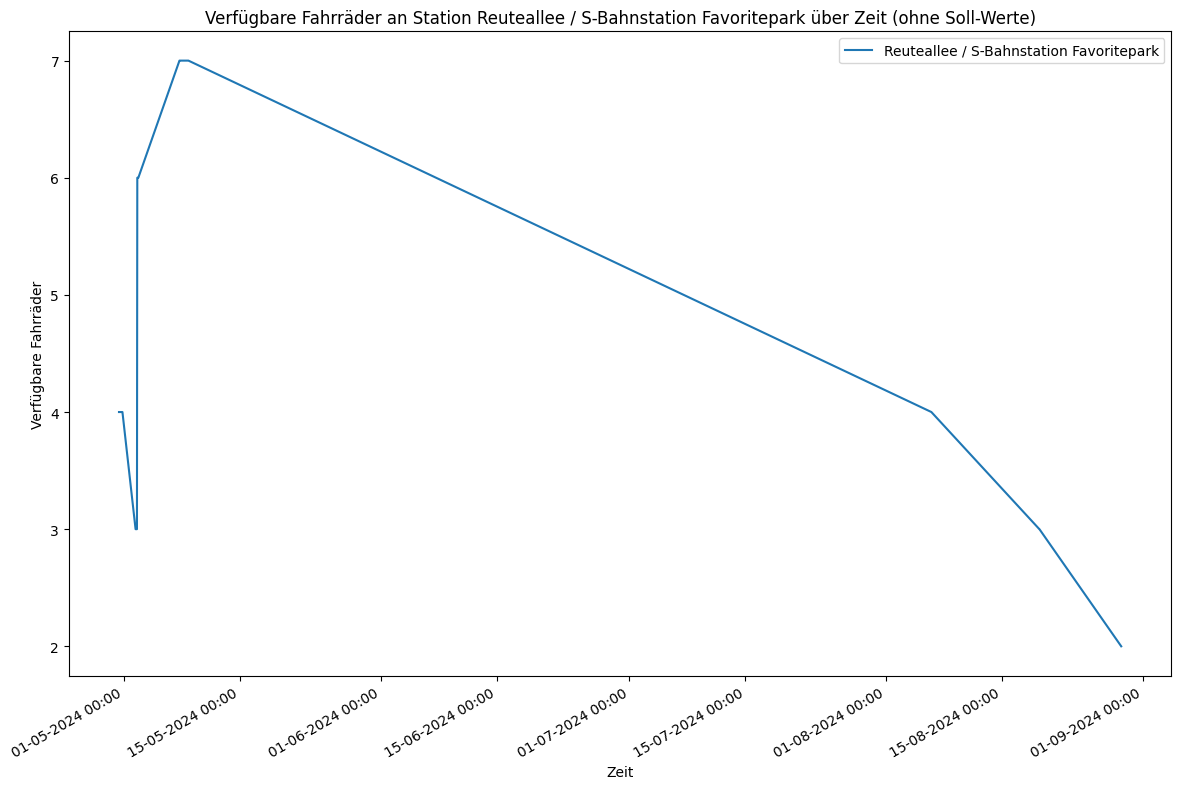

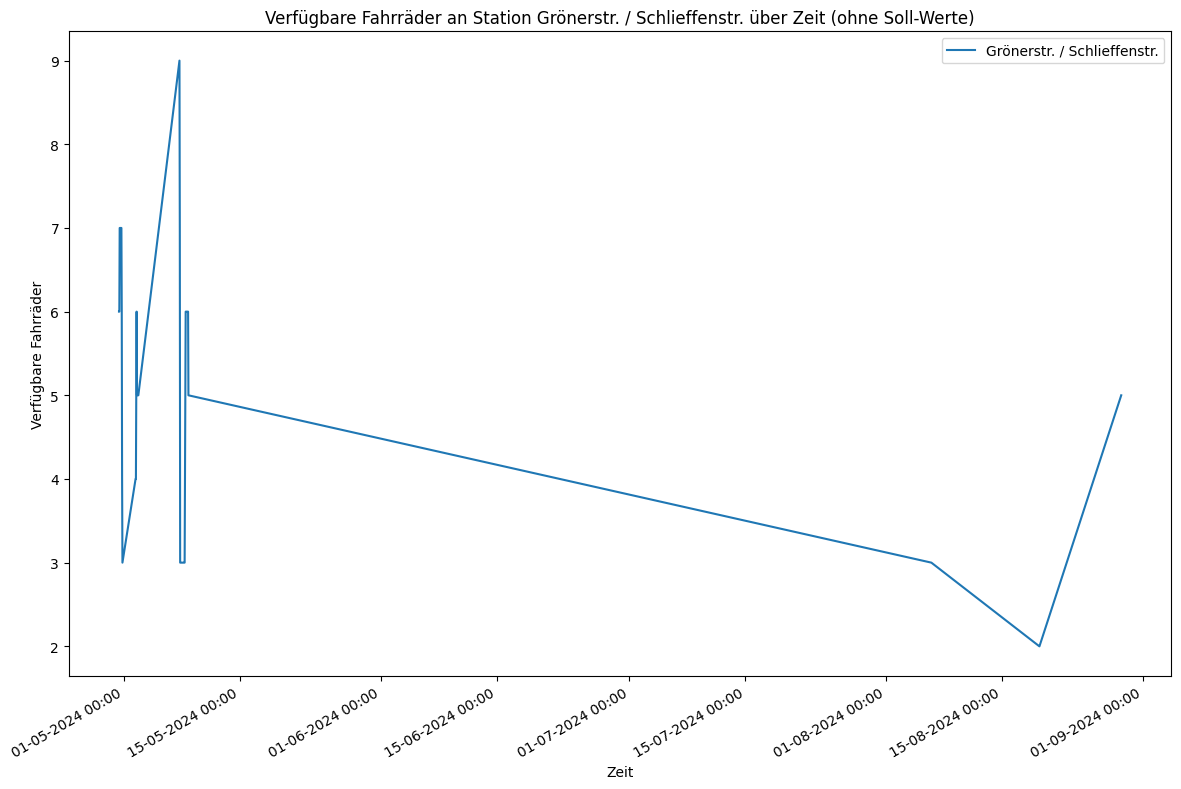

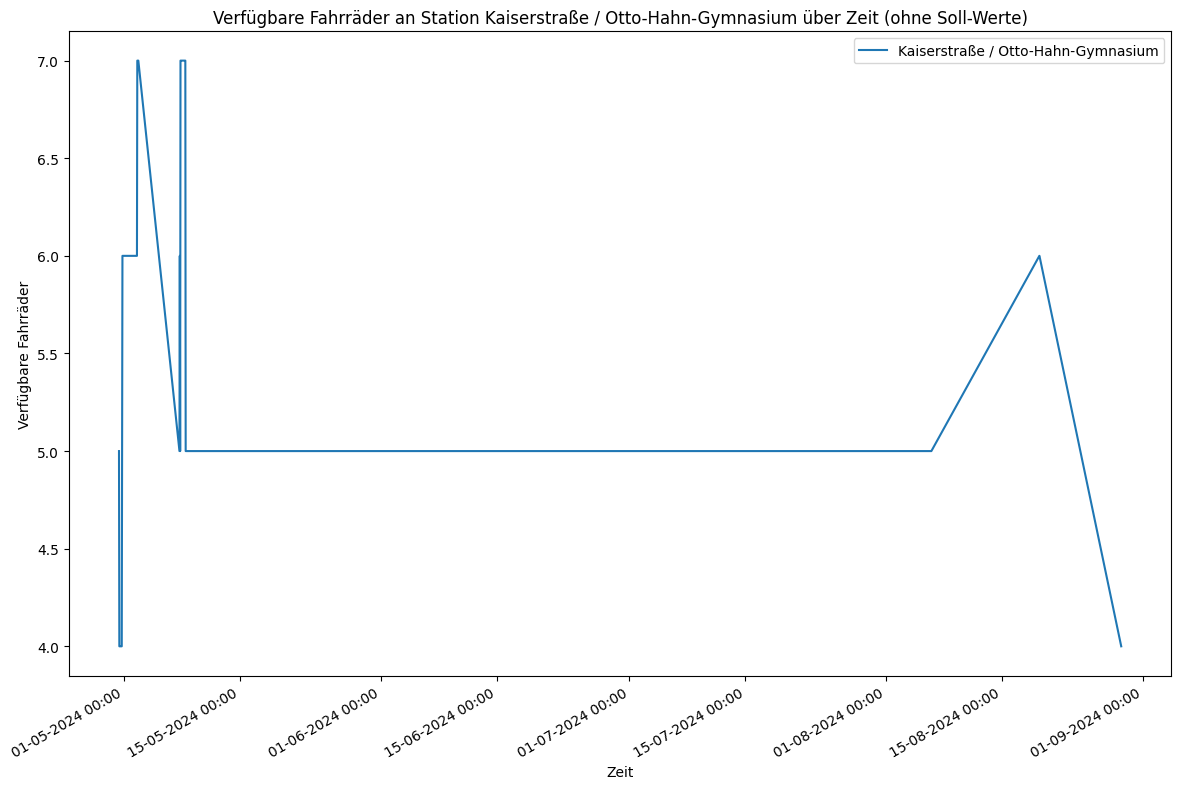

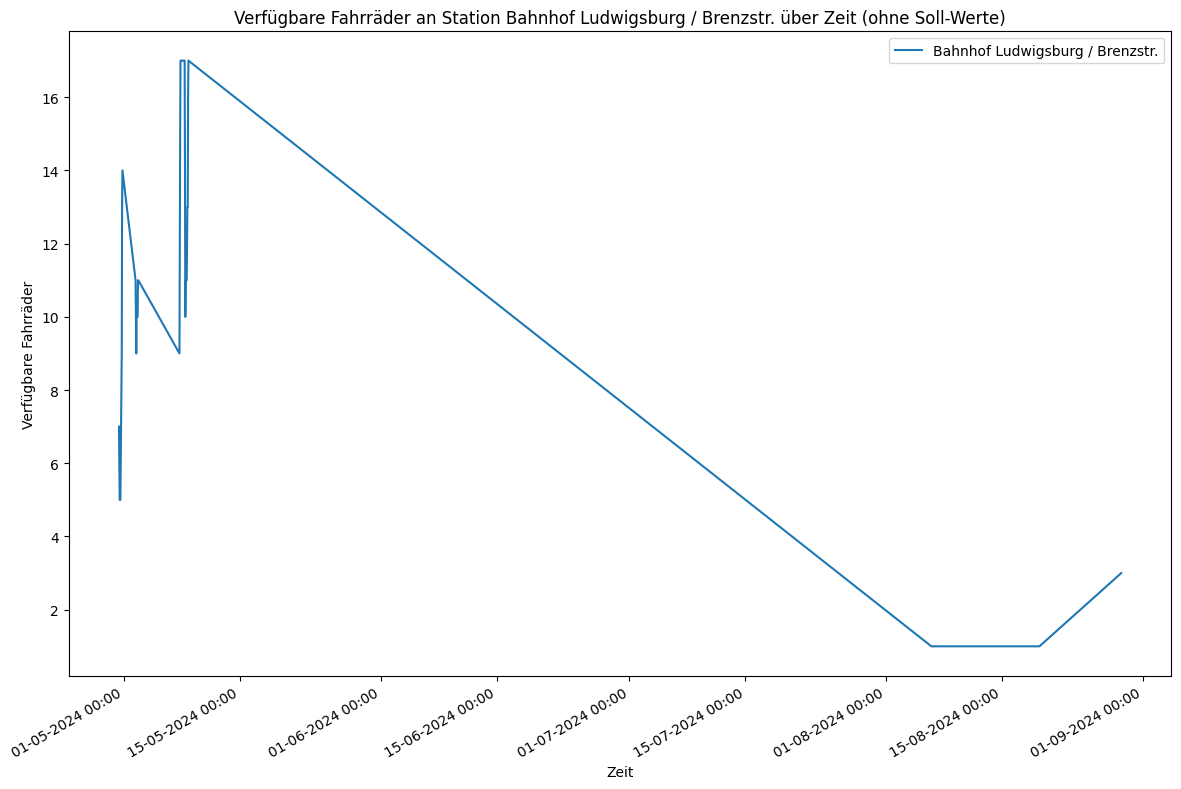

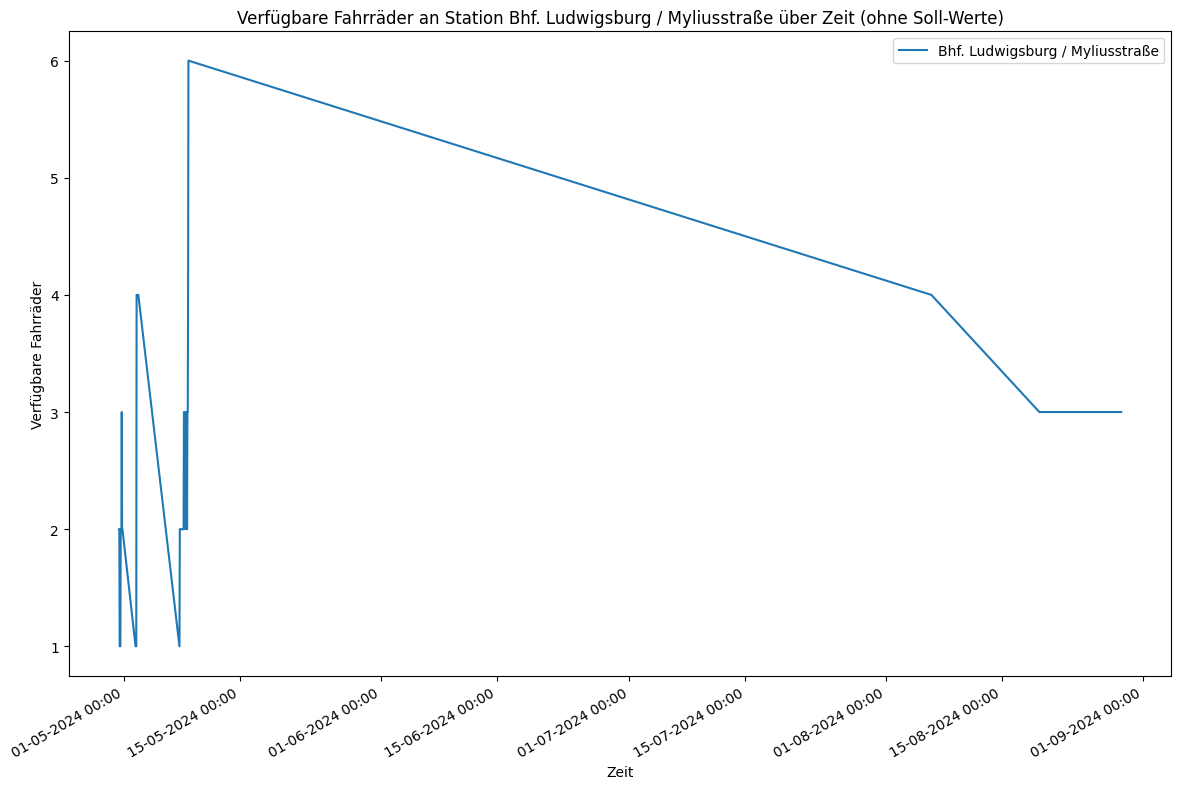

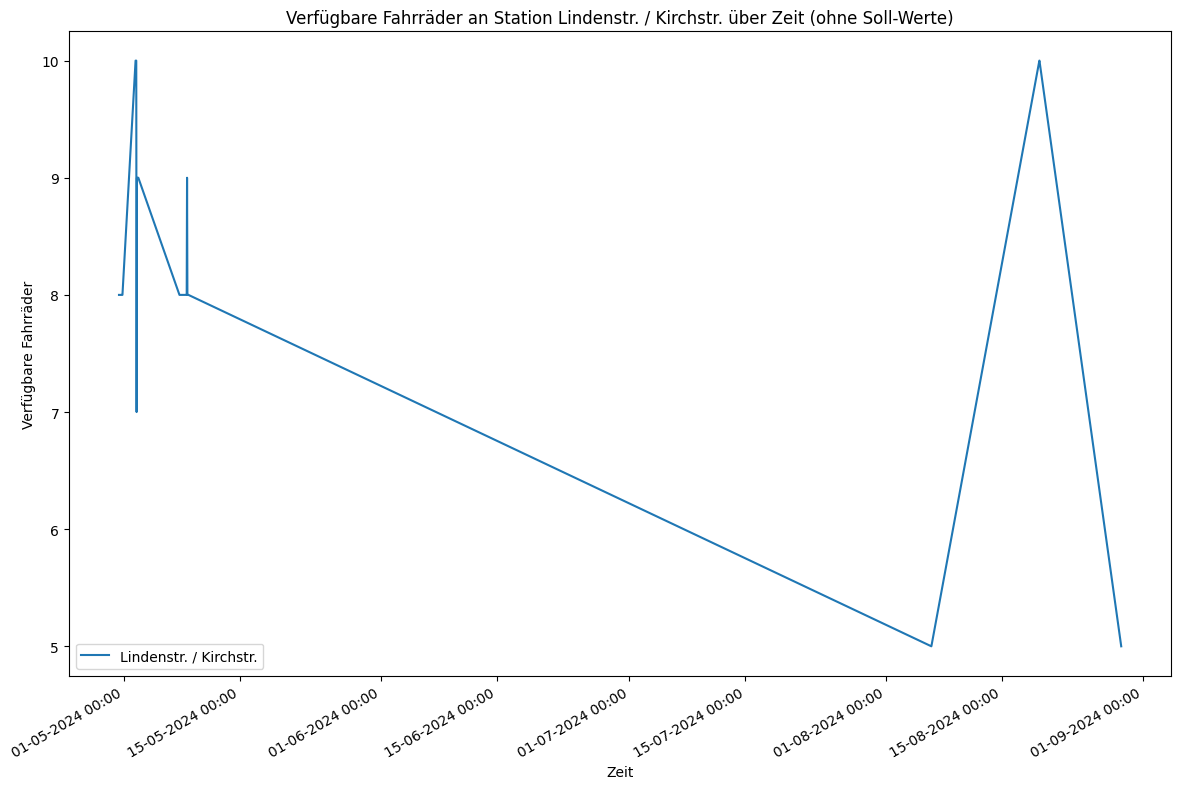

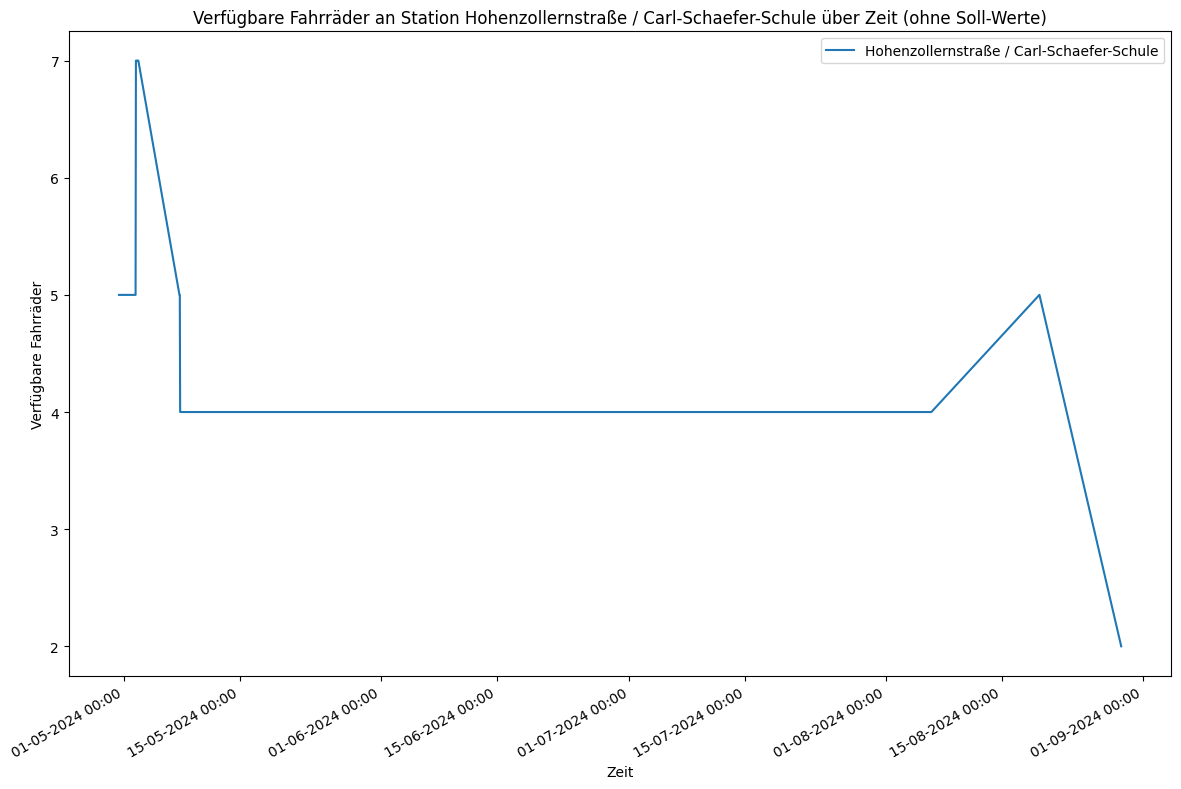

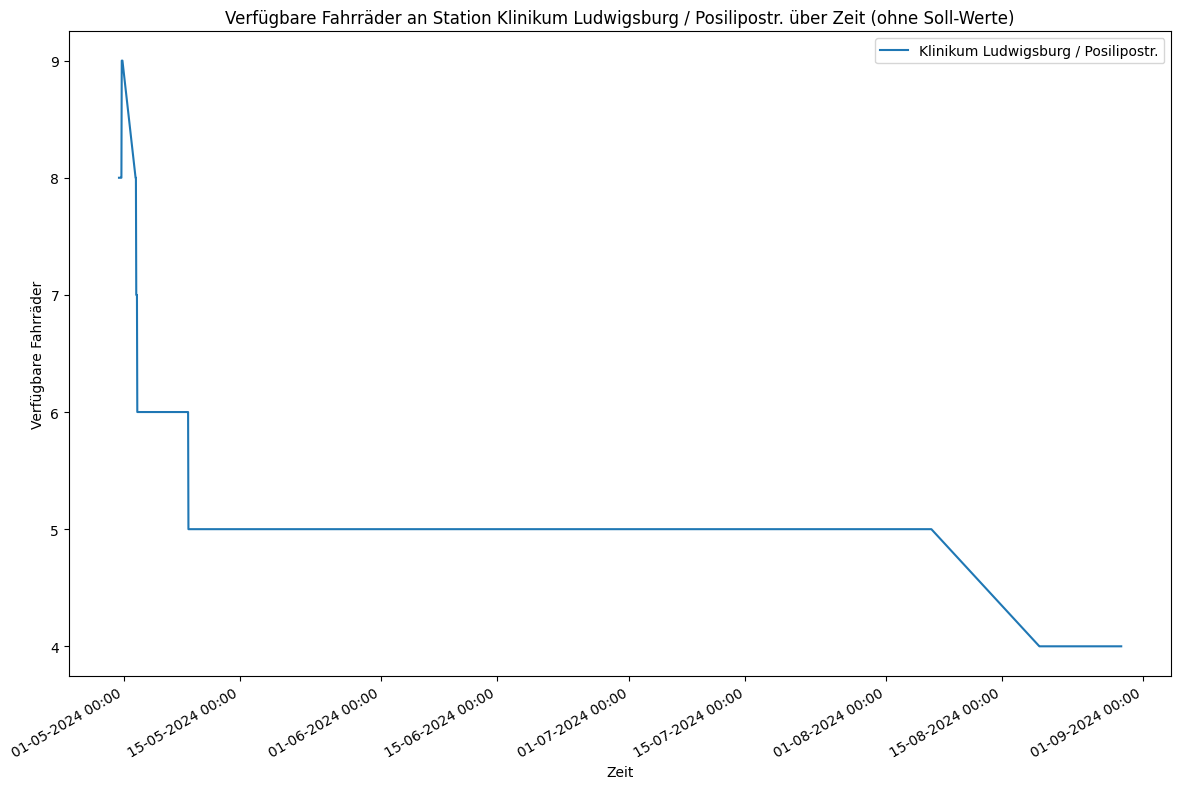

In [5]:
# Reuteallee / S-Bahnstation Favoritepark
visualize_single_station_no_soll('958219cd-8009-45b6-8a04-1cc4ae763307', bike_type='all')

# Grönerstr. / Schlieffenstr.
visualize_single_station_no_soll('714932fd-4836-4a2a-9a19-07a6d694274c', bike_type='all')

# Kaiserstraße / Otto-Hahn-Gymnasium
visualize_single_station_no_soll('be796eb3-49af-494c-b3f0-dc1f0132eb7d', bike_type='all')

# Bahnhof Ludwigsburg / Brenzstr.
visualize_single_station_no_soll('c070e40c-98f6-45d6-9543-90ceceef63af', bike_type='all')

# Bahnhof. Ludwigsburg / Myliusstraße
visualize_single_station_no_soll('ca41b63e-9046-442f-880e-d0e9186e507a', bike_type='all')

# Holzmarkt / Asperger Str.
visualize_single_station_no_soll('36fe6a30-d53e-4aa8-863d-e21e80fd1d0b', bike_type='all')

# Arsenalplatz
visualize_single_station_no_soll('7046d131-47fd-40bd-ba63-f52590d2ee8f', bike_type='all')

# Ludwigsburg (Württemberg) ZOB
visualize_single_station_no_soll('2263b695-db35-4bbf-b70a-032920fadf3f', bike_type='all')


5. Visualisierung für alle Stationen mit Soll-Werten <br>
Visualisieren der Verfügbarkeit der Fahrräder an allen Stationen über die Zeit mit Soll-Werten.

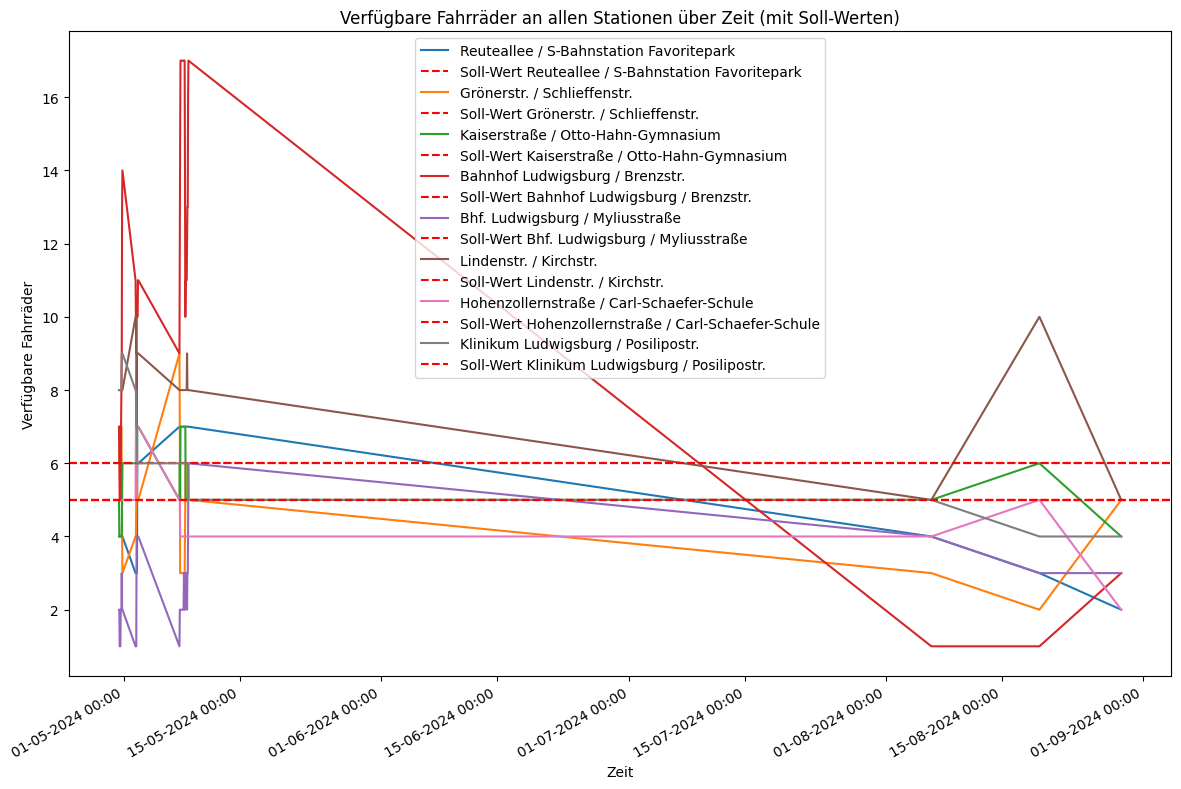

In [6]:
def visualize_all_stations_with_soll(bike_type='all'):
    plt.figure(figsize=(12, 8))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()
    
    for station_id in lubu_ids:
        if station_id in station_data['station_id'].values:
            filtered_data = station_data[station_data['station_id'] == station_id].to_dict('records')
            
            if bike_type == 'all':
                counts = [entry['num_bikes_available'] for entry in filtered_data]
                soll_value = soll_werte[soll_werte['station_id'] == station_id][['bike', 'pedelec', 'cargopedelec']].sum(axis=1).values[0]
            else:
                counts = extract_vehicle_count(filtered_data, bike_type)
                soll_value = soll_werte[soll_werte['station_id'] == station_id][bike_type].values[0]
            
            plt.plot([entry['timestamp'] for entry in filtered_data], counts, label=id_to_name[station_id])
            plt.axhline(y=soll_value, color='r', linestyle='--', label=f'Soll-Wert {id_to_name[station_id]}')
    
    plt.title('Verfügbare Fahrräder an allen Stationen über Zeit (mit Soll-Werten)')
    plt.xlabel('Zeit')
    plt.ylabel('Verfügbare Fahrräder')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Aufruf zur Visualisierung für alle Stationen mit Soll-Werten
visualize_all_stations_with_soll(bike_type='all')


6. Visualisierung für eine einzelne Station mit Soll-Werten <br>
Visualisieren der Verfügbarkeit der Fahrräder an einer einzelnen Station über die Zeit mit Soll-Werten.

In [7]:
def visualize_single_station_with_soll(station_id_requested, bike_type='all'):
    plt.figure(figsize=(12, 8))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()

    if station_id_requested in lubu_ids and station_id_requested in station_data['station_id'].values:
        filtered_data = station_data[station_data['station_id'] == station_id_requested].to_dict('records')
        
        if bike_type == 'all':
            counts = [entry['num_bikes_available'] for entry in filtered_data]
            # Summe der Soll-Werte für alle Fahrzeugtypen
            soll_value = soll_werte[soll_werte['station_id'] == station_id_requested][['bike', 'pedelec', 'cargopedelec']].sum(axis=1).values[0]
        else:
            counts = extract_vehicle_count(filtered_data, bike_type)
            # Soll-Wert für den spezifischen Fahrzeugtyp
            soll_value = soll_werte[soll_werte['station_id'] == station_id_requested][bike_type].values[0]
        
        plt.plot([entry['timestamp'] for entry in filtered_data], counts, label=id_to_name[station_id_requested])
        plt.axhline(y=soll_value, color='r', linestyle='--', label=f'Soll-Wert {id_to_name[station_id_requested]}')
        
        plt.title(f'Verfügbare Fahrräder an Station {id_to_name[station_id_requested]} über Zeit (mit Soll-Werten)')
        plt.xlabel('Zeit')
        plt.ylabel('Verfügbare Fahrräder')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Keine Daten für Station ID {station_id_requested} gefunden.")

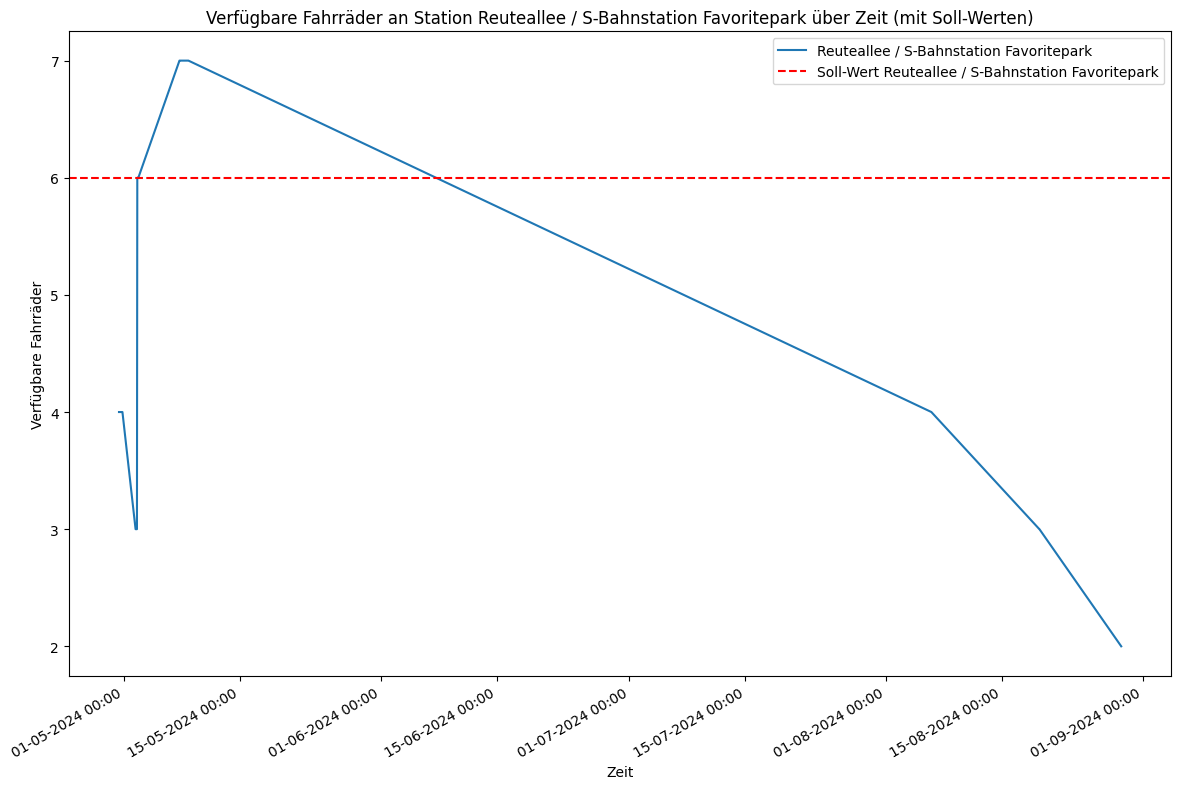

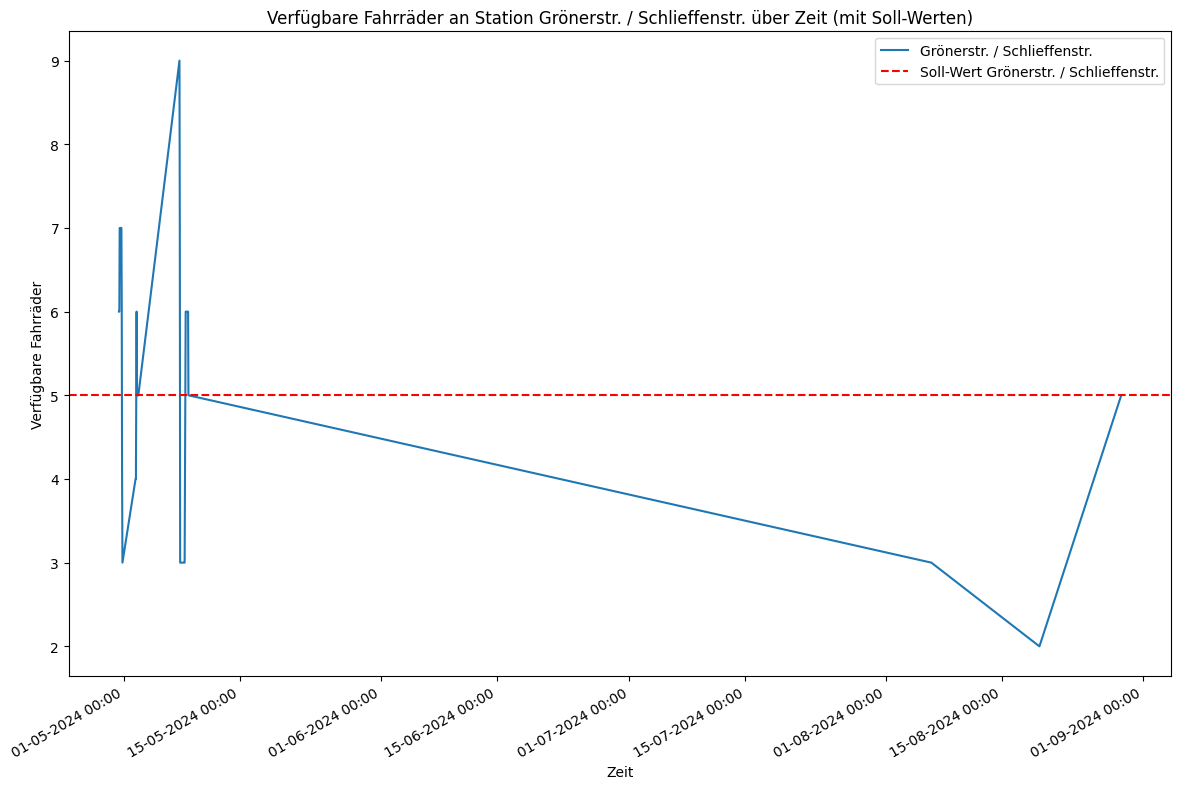

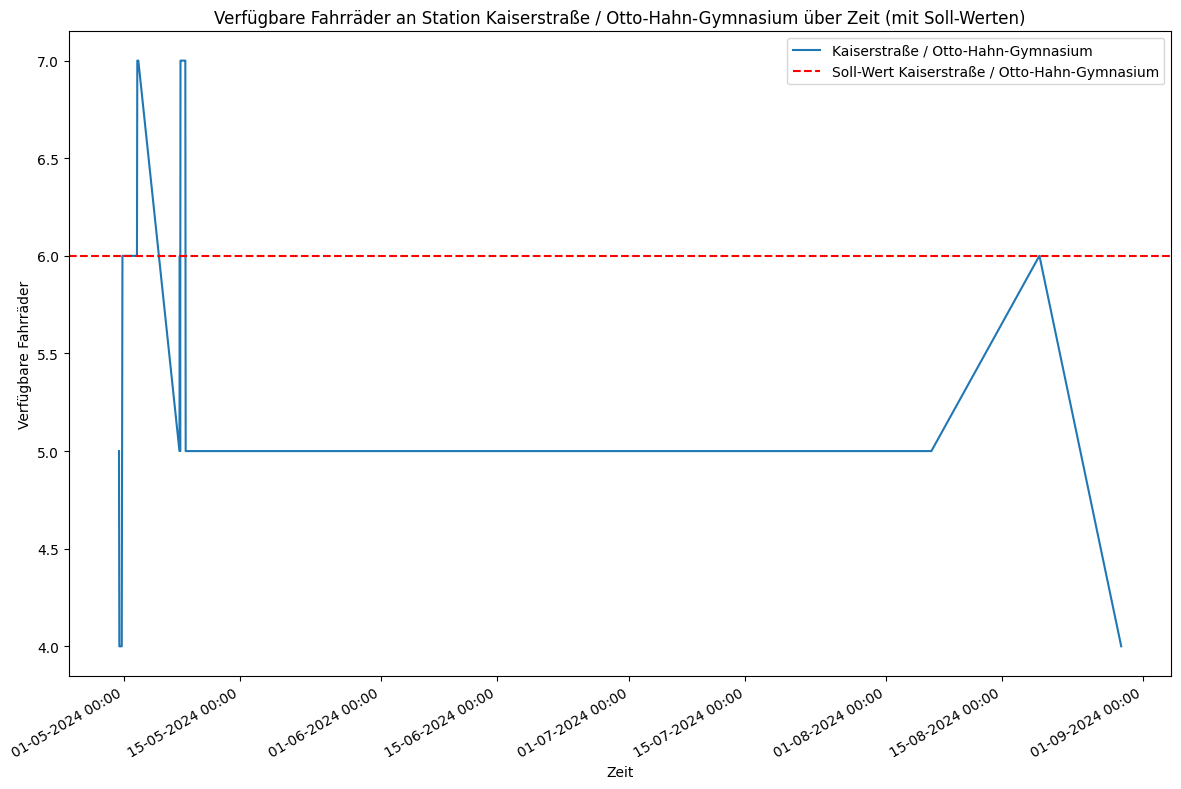

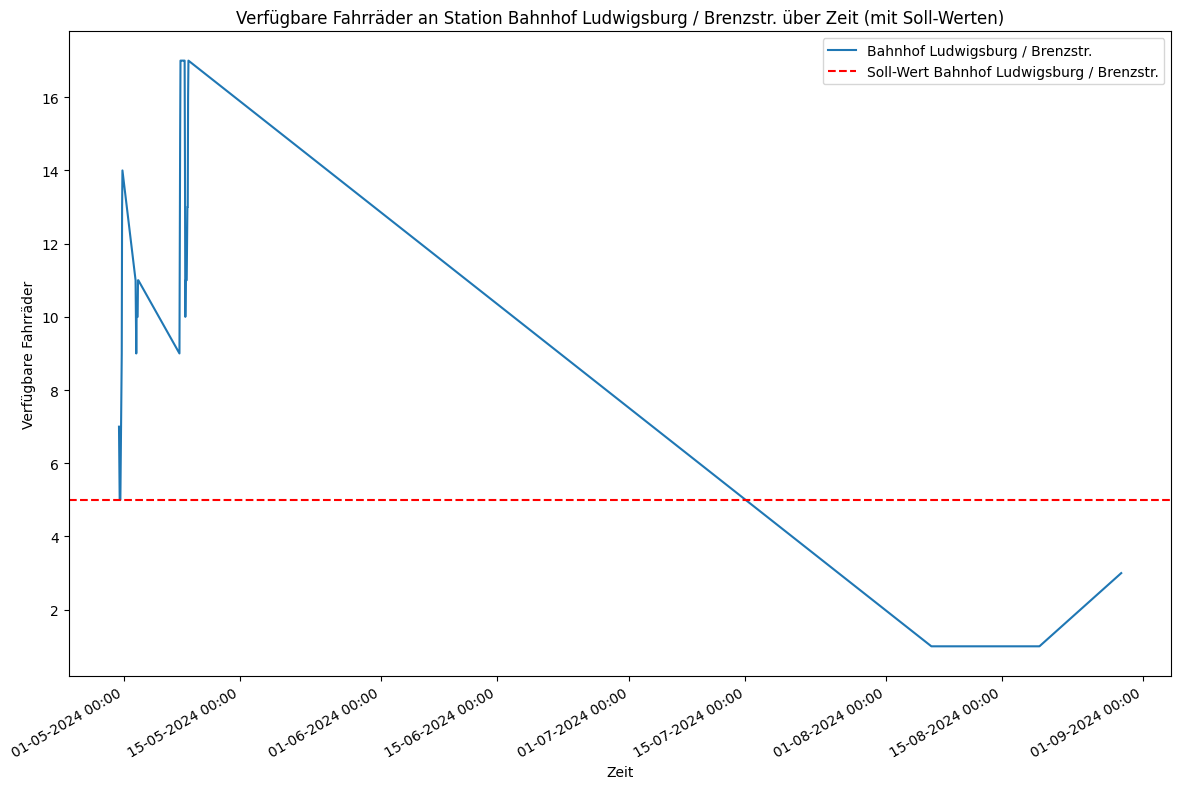

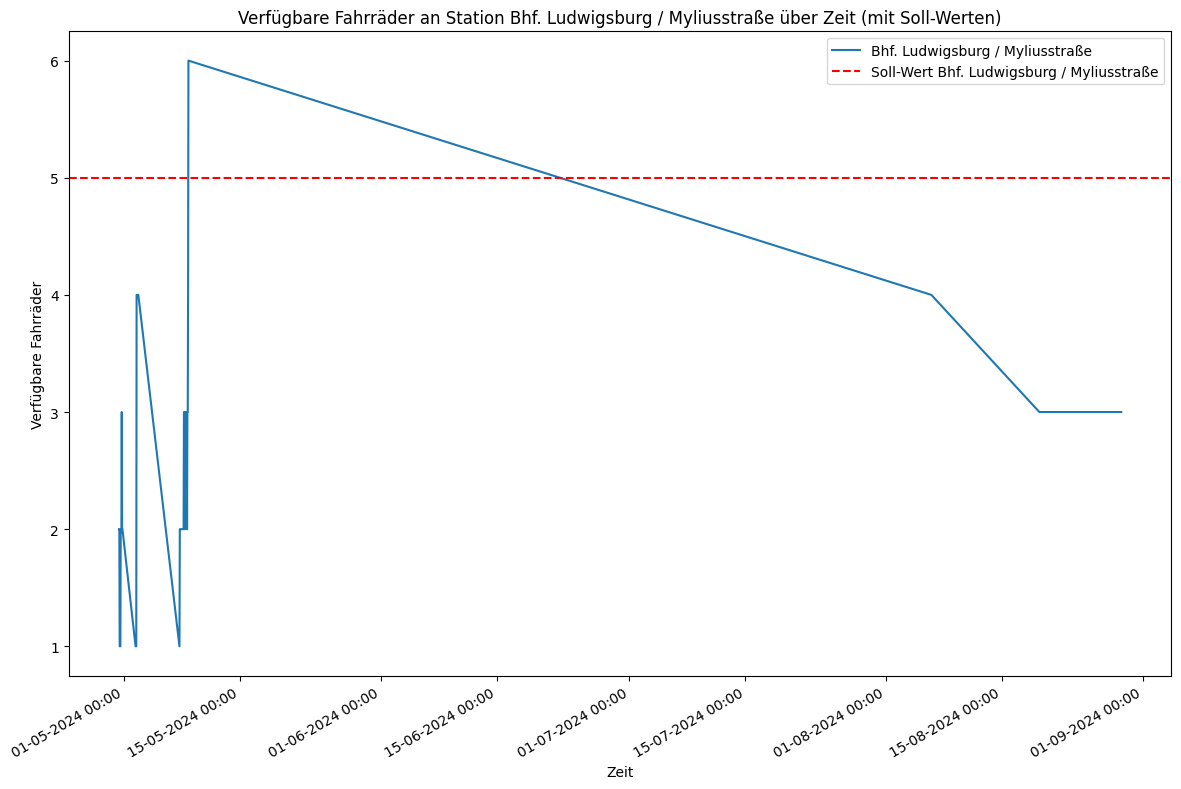

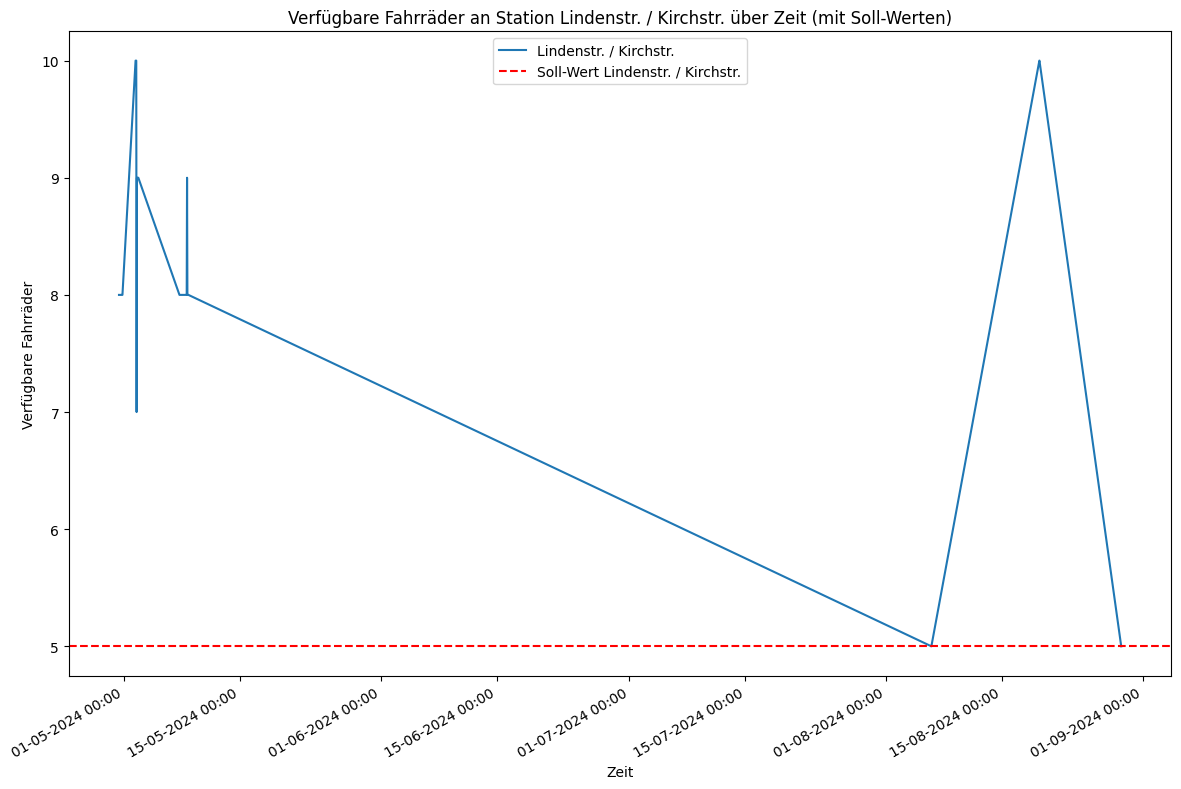

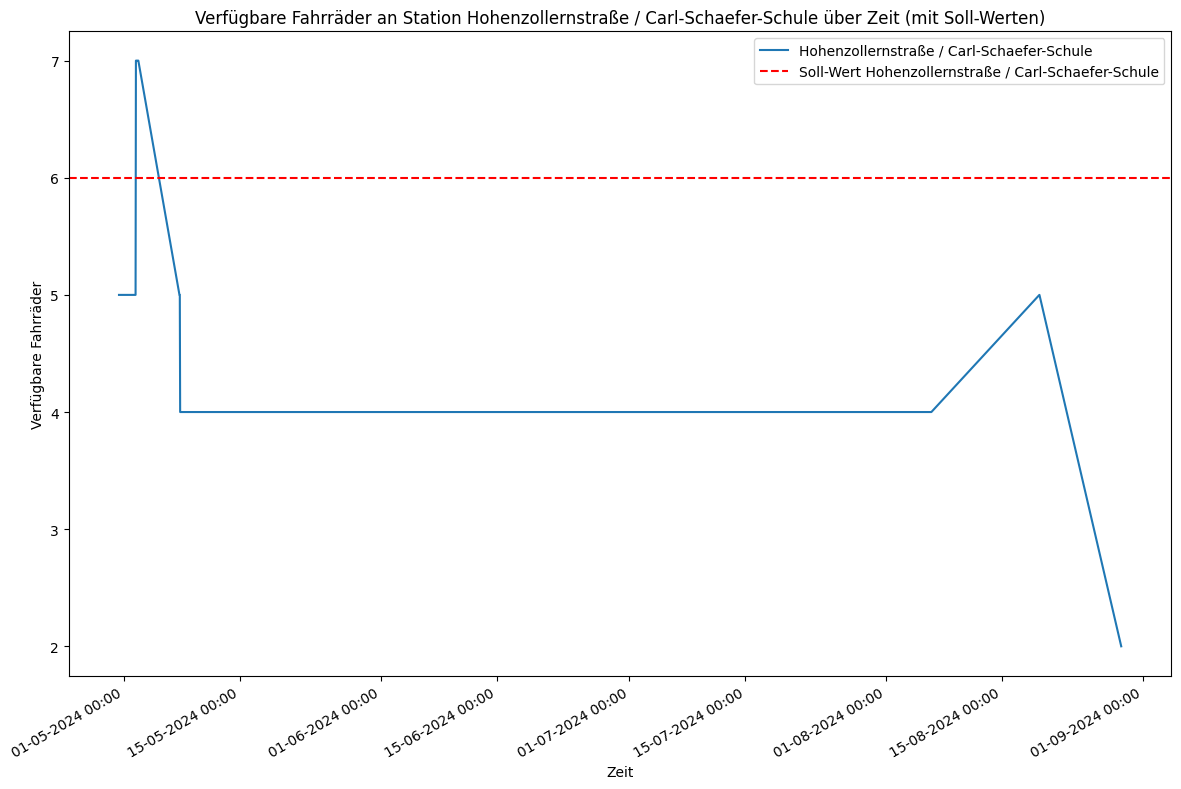

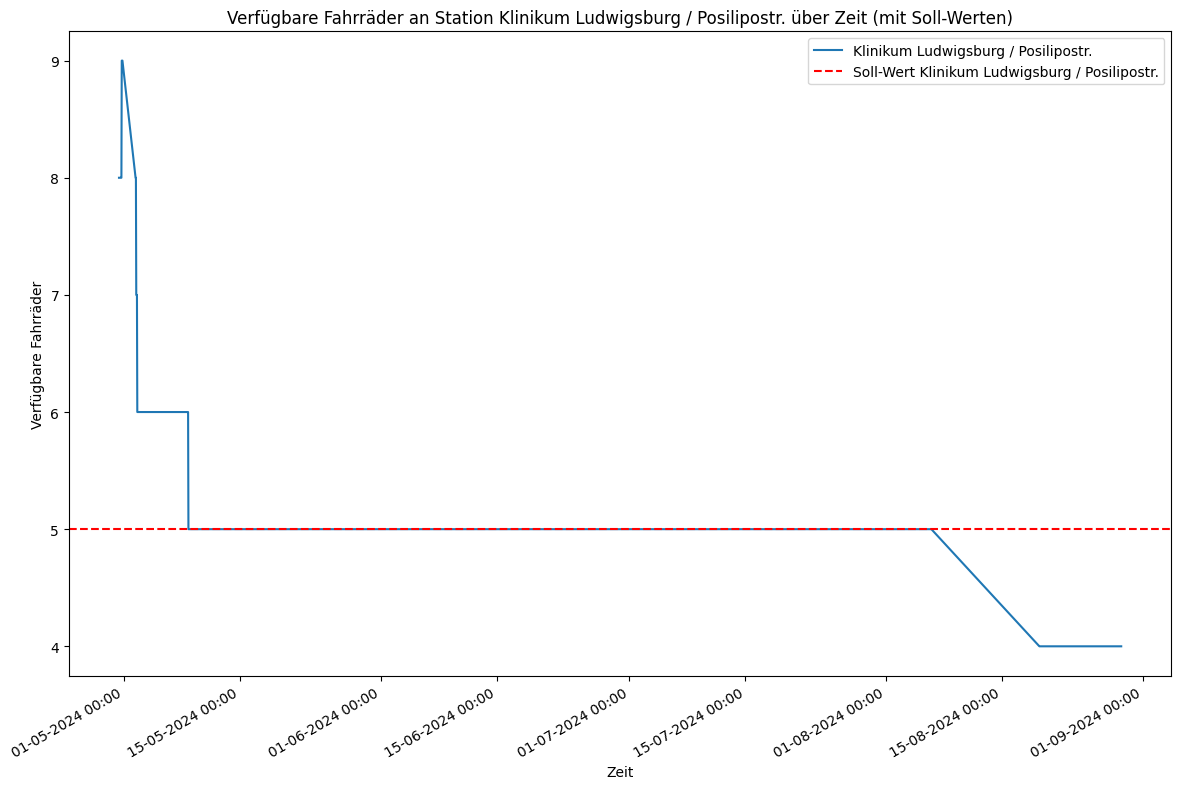

In [8]:
# Reuteallee / S-Bahnstation Favoritepark
visualize_single_station_with_soll('958219cd-8009-45b6-8a04-1cc4ae763307', bike_type='all')

# Grönerstr. / Schlieffenstr.
visualize_single_station_with_soll('714932fd-4836-4a2a-9a19-07a6d694274c', bike_type='all')

# Kaiserstraße / Otto-Hahn-Gymnasium
visualize_single_station_with_soll('be796eb3-49af-494c-b3f0-dc1f0132eb7d', bike_type='all')

# Bahnhof Ludwigsburg / Brenzstr.
visualize_single_station_with_soll('c070e40c-98f6-45d6-9543-90ceceef63af', bike_type='all')

# Bahnhof. Ludwigsburg / Myliusstraße
visualize_single_station_with_soll('ca41b63e-9046-442f-880e-d0e9186e507a', bike_type='all')

# Holzmarkt / Asperger Str.
visualize_single_station_with_soll('36fe6a30-d53e-4aa8-863d-e21e80fd1d0b', bike_type='all')

# Arsenalplatz
visualize_single_station_with_soll('7046d131-47fd-40bd-ba63-f52590d2ee8f', bike_type='all')

# Ludwigsburg (Württemberg) ZOB
visualize_single_station_with_soll('2263b695-db35-4bbf-b70a-032920fadf3f', bike_type='all')
